# feature generation
This repository contains the code for training CNN classifier with 200x200 cropped images for the Capstone project.

### Instructions
1. This is running on google colab (faster than PC)
2. upload datasets and codes to colab
3. set the training data number n and testing data number n_t and the correct path of train and test dataset(in npz format).
4. set the architecture of the CNN model, the first layer size must align with the input image.
4. train and test model.

### Reference
1. CNN-keras: https://www.tensorflow.org/tutorials/images/cnn

In [1]:
from PIL import Image
from google.colab import drive
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
n = 2430
n_t = 2664

train = np.load('/content/drive/My Drive/Colab Notebooks/2430_datasetA.npz')
test=np.load('/content/drive/My Drive/Colab Notebooks/2664_1st2ndDatasetA_testset_strong.npz')
x_train_image,x_test_image, y_train_label, y_test_label = train['data'],test['data'],train['label'],test['label']
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (2430, 200, 200)
y_train_label: (2430,)


In [3]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap = 'gray')
    plt.show()

In [4]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=120):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='gray')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=5) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

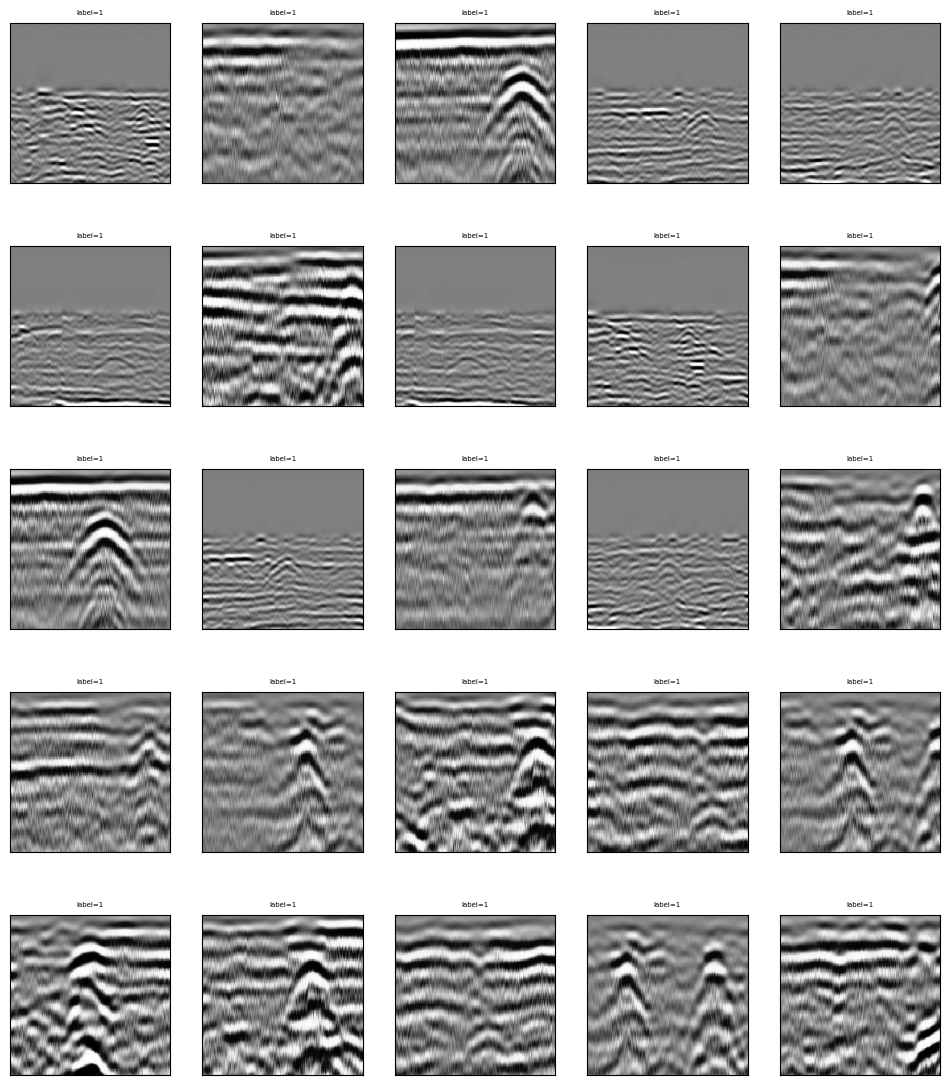

In [5]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,25)

In [6]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)
x_Train4D =x_train_image.reshape(x_train_image.shape [0],200,200,1).astype('float32')
x_Test4D =x_test_image.reshape(x_test_image.shape [0],200,200,1).astype('float32')
print ('x_train:',x_Train4D.shape)
print ('x_test:',x_Test4D.shape)
x_Train_normalize = x_Train4D/ 255
x_Test_normalize = x_Test4D/ 255
x_Train_normalize[0]
x_Test_normalize[0]

x_train_image: (2430, 200, 200)
y_train_label: (2430,)
x_train: (2430, 200, 200, 1)
x_test: (2664, 200, 200, 1)


array([[[0.56078434],
        [0.56078434],
        [0.56078434],
        ...,
        [0.5529412 ],
        [0.54509807],
        [0.53333336]],

       [[0.6117647 ],
        [0.6117647 ],
        [0.6117647 ],
        ...,
        [0.5411765 ],
        [0.5254902 ],
        [0.50980395]],

       [[0.6784314 ],
        [0.6784314 ],
        [0.6745098 ],
        ...,
        [0.49019608],
        [0.46666667],
        [0.4509804 ]],

       ...,

       [[0.5647059 ],
        [0.5372549 ],
        [0.47058824],
        ...,
        [0.43529412],
        [0.58431375],
        [0.56078434]],

       [[0.5411765 ],
        [0.5019608 ],
        [0.45882353],
        ...,
        [0.49019608],
        [0.5647059 ],
        [0.52156866]],

       [[0.5294118 ],
        [0.4745098 ],
        [0.45882353],
        ...,
        [0.47058824],
        [0.6       ],
        [0.42745098]]], dtype=float32)

In [7]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_train_label)
y_label_test_OneHot = np_utils.to_categorical(y_test_label)
#y_Train_OneHot[:5]
print(y_label_train_OneHot)
print(y_label_test_OneHot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()

In [36]:
# cov1
model.add(Conv2D(filters=32,kernel_size=(5,5),
                 input_shape=(200,200,1), 
                 activation='relu', 
                 padding='same'))

In [37]:
# pooling1
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
# cov2&pooling2
model.add(Conv2D(filters=64, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
# cov3&pooling3
model.add(Conv2D(filters=128, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
# cov4&pooling4
model.add(Conv2D(filters=256, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
# fully connected layer
model.add(Flatten())
model.add(Dropout(rate=0.1))

In [42]:
# dense layer
model.add(Dense(2048, activation='relu'))
model.add(Dropout(rate=0.1))

In [43]:
# output layer
model.add(Dense(2, activation='softmax'))

In [44]:
# print the model architecture
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      832       
                                                                 
 dropout_6 (Dropout)         (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 dropout_7 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [46]:
# complie the CNN model above
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [47]:
# training and the process of training
train_history=model.fit(x_Train_normalize,y_label_train_OneHot,
  validation_data=(x_Test_normalize, y_label_test_OneHot),epochs=8, batch_size= 32, verbose=1)          

Epoch 1/8
76/76 [==============================] - 1146s 15s/step - loss: 0.6344 - accuracy: 0.8115 - val_loss: 0.4376 - val_accuracy: 0.8333
Epoch 2/8
76/76 [==============================] - 1150s 15s/step - loss: 0.3289 - accuracy: 0.8667 - val_loss: 0.3762 - val_accuracy: 0.8656
Epoch 3/8
76/76 [==============================] - 1153s 15s/step - loss: 0.2170 - accuracy: 0.9091 - val_loss: 0.2474 - val_accuracy: 0.8956
Epoch 4/8
76/76 [==============================] - 1101s 14s/step - loss: 0.1705 - accuracy: 0.9251 - val_loss: 0.2616 - val_accuracy: 0.8938
Epoch 5/8
76/76 [==============================] - 1099s 14s/step - loss: 0.1428 - accuracy: 0.9391 - val_loss: 0.2534 - val_accuracy: 0.9118
Epoch 6/8
76/76 [==============================] - 1142s 15s/step - loss: 0.1129 - accuracy: 0.9514 - val_loss: 0.1995 - val_accuracy: 0.9122
Epoch 7/8
76/76 [==============================] - 1146s 15s/step - loss: 0.0951 - accuracy: 0.9621 - val_loss: 0.1968 - val_accuracy: 0.9163
Epoch 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

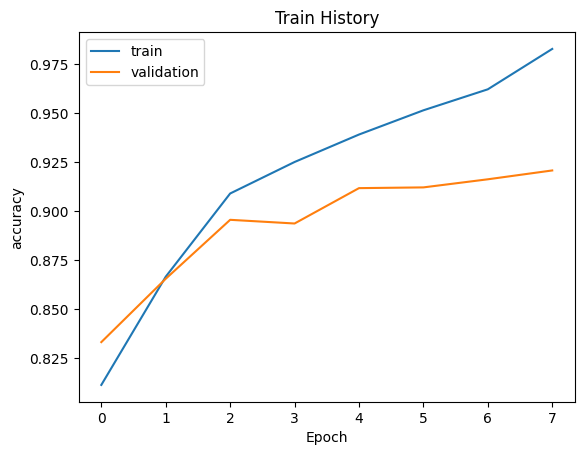

In [48]:
# training progress: accuracy
show_train_history(train_history,'accuracy','val_accuracy')

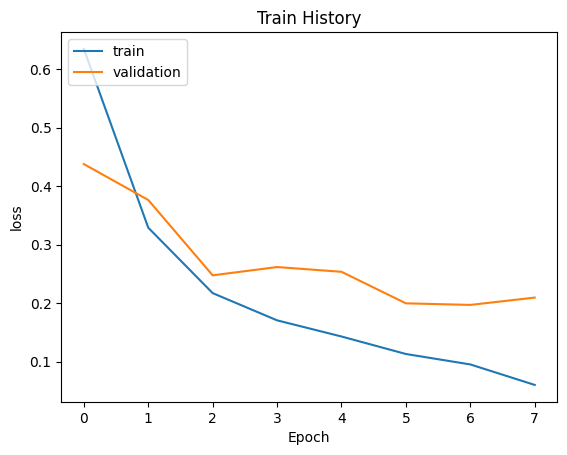

In [49]:
# training progress: loss function
show_train_history(train_history,'loss','val_loss')

In [23]:
# scores = model.evaluate(x_Test_normalize, y_label_test_OneHot)
# print('accuracy=',scores[1])

In [50]:
# prediction=model.predict_classes(x_Test_normalize)
prediction=model.predict(x_Test_normalize)

84/84 [==============================] - 214s 3s/step


In [25]:
# print out the prediction probabilities for the first 10 images
prediction[:10]

array([[0.8115073 , 0.18849266],
       [0.27394575, 0.72605425],
       [0.70379096, 0.29620904],
       [0.48961824, 0.5103818 ],
       [0.5642715 , 0.4357285 ],
       [0.26789987, 0.73210007],
       [0.7726556 , 0.22734444],
       [0.8692662 , 0.1307338 ],
       [0.4400189 , 0.5599811 ],
       [0.45638606, 0.54361385]], dtype=float32)

In [51]:
binary = np.where(prediction.T[1].T >= 0.5, 1, 0)
print(binary)

[0 1 0 ... 0 0 0]


In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num= 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='gray')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

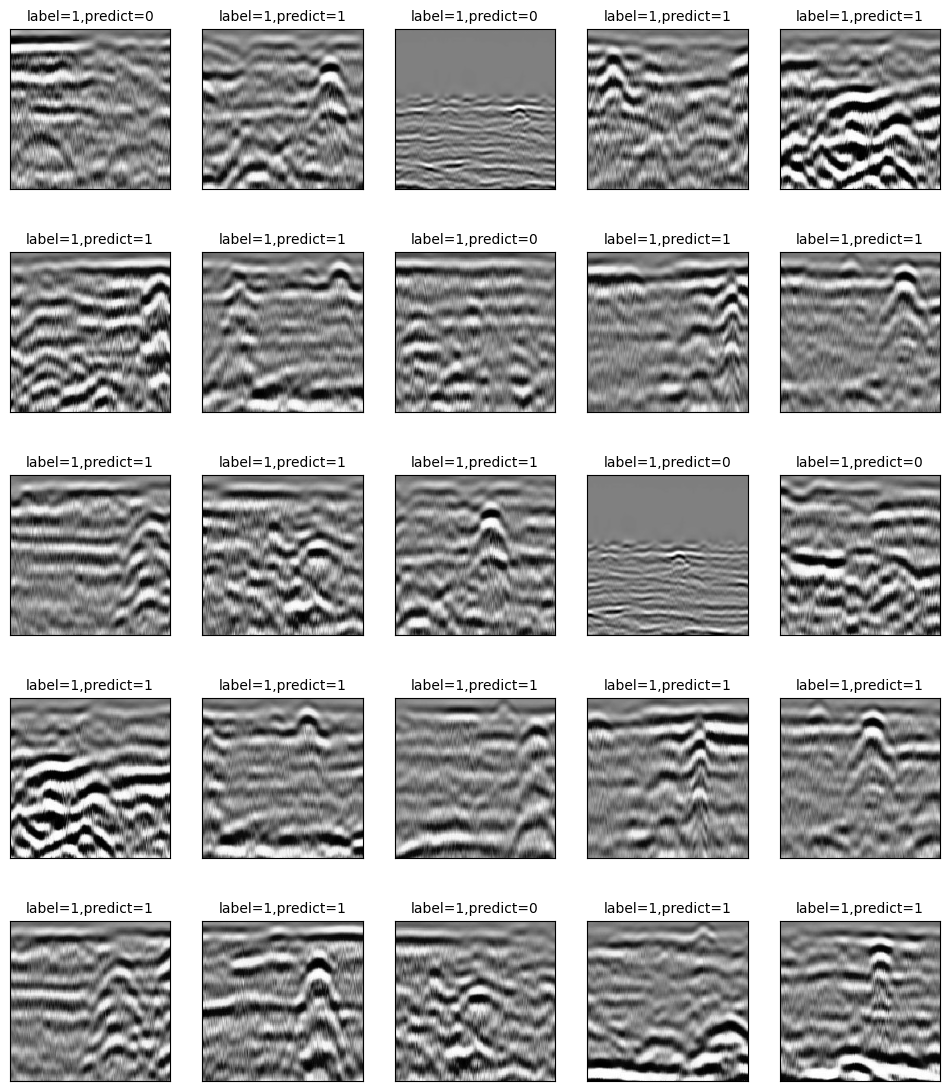

In [52]:
# print out a part of false negative images
plot_images_labels_prediction(x_test_image,y_test_label,binary,idx=0,num=25)

In [53]:
y_test_label_new = y_test_label.reshape(n_t).astype('float32')
print(y_test_label_new.shape)
print(binary.shape)

(2664,)
(2664,)


In [54]:
# confusion matrix
import pandas as pd
pd.crosstab(y_test_label_new,binary,rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0.0,2115,105
1.0,106,338


In [55]:
# testing report
from sklearn.metrics import classification_report
print("testing result")
print(classification_report(y_test_label_new, binary))

testing result
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2220
         1.0       0.76      0.76      0.76       444

    accuracy                           0.92      2664
   macro avg       0.86      0.86      0.86      2664
weighted avg       0.92      0.92      0.92      2664



In [32]:
def plot_images_labels_wrong_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
      num=25

    for i in range(0, num):
        if idx < len(labels) :
            # while labels[idx] == prediction[idx] :
            #     idx+=1
            # else:
            #     ax=plt.subplot(5,5, 1+i)
            #     ax.imshow(images[idx], cmap='gray')

            #     ax.set_title("label=" +str(labels[idx])+
            #          ",predict="+str(prediction[idx])
            #          ,fontsize=10) 
        
            #     ax.set_xticks([]);ax.set_yticks([])        
            #     idx+=1

            while labels[idx] != 0 or prediction[idx] != 1 :
                idx+=1
            else:
                ax=plt.subplot(5,5, 1+i)
                ax.imshow(images[idx], cmap='gray')

                ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
                ax.set_xticks([]);ax.set_yticks([])        
                idx+=1
    plt.show()


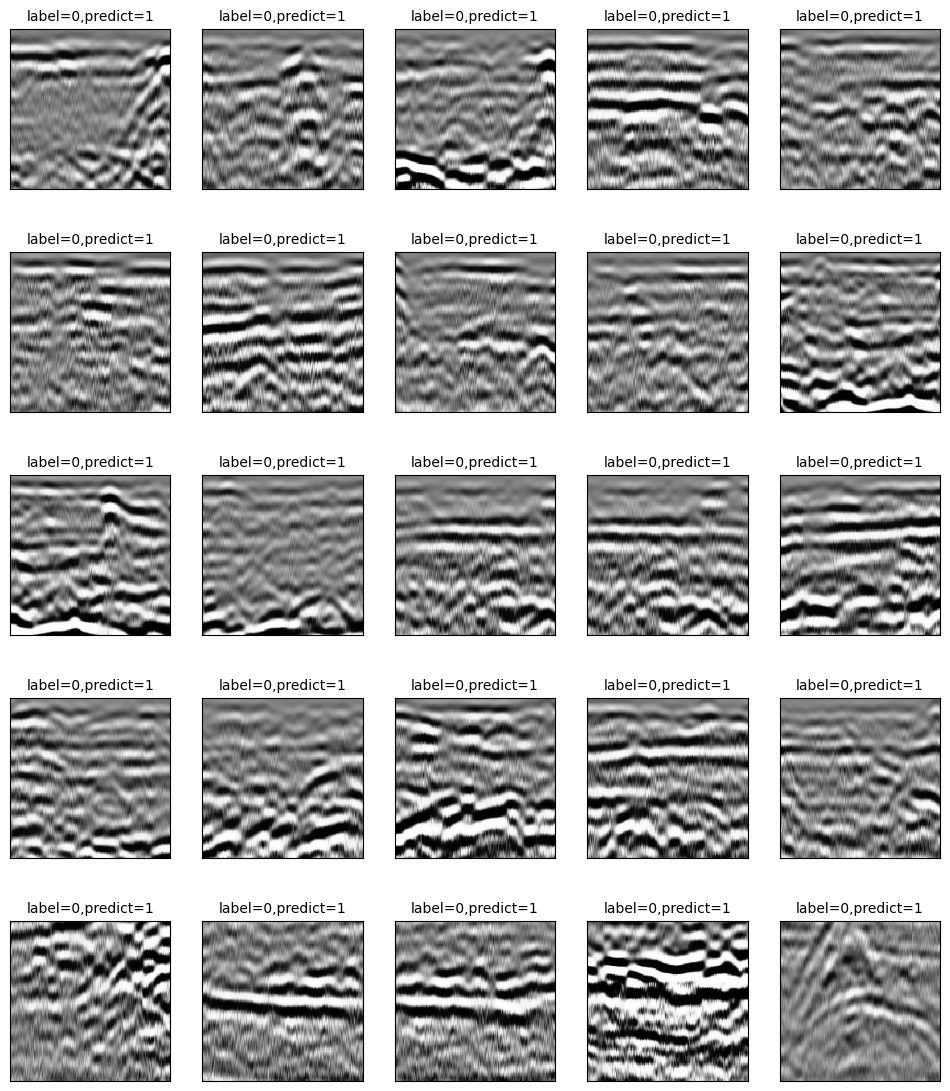

In [56]:
plot_images_labels_wrong_prediction(x_test_image,y_test_label,binary,idx=0,num=100)

In [57]:
model.save("/content/drive/My Drive/Colab Notebooks/hyperbola_vgg2.keras")